Assignment \#3: Linear State Space Models
=========================================

Please answer all three questions below within a Jupyter notebook.

**Due: 03rd March, 2016**

Submission of the assignment is due before 9:30am to econ370nyu@gmail.com. 

Please use the following standard for the subject email title ``assignment#3-<lastname>-<id>``.


# Question 1

Consider the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

(1) Write down the linear state space system to represent the equations above

(2) Assume that $\phi_1=-1.8$, $\phi_2=0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Plot the impulse reponse graph for this system. (Hint: assume $w_t=0$ for $t\leq 0$, and assume $w_t=1$ for $t=1$.)

(3) Simulate the economy for 1000 periods, and plot the simulated path for $y_t$. You can choose the starting value of $y_t$ as you like.

(4) Change the parameters to be the following: $\phi_1=-2.0$, $\phi_2=0.75$, $\theta=0.0$, and $w_t\sim \mathcal N(0,1)$.  Plot the impulse reponse graph for this system. Is this a mean-reverting process?

(1)

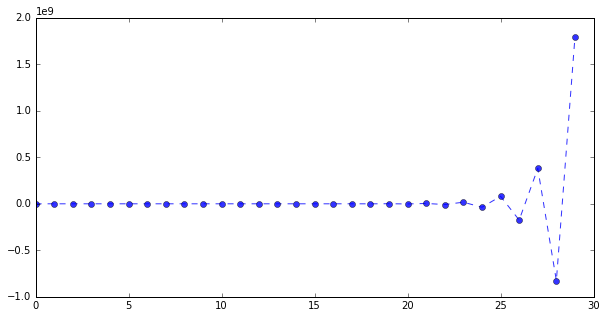

In [77]:
#(3) Simulated path for y_t, N=1000
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 30
std = 1.0
phi_1 = -1.8
phi_2 = 0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0])
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    #Simul_x each row represents the state vector for that time. row 0 = x_0, row 1 = x_1 ...
    Simul_y[i] = np.dot(G, Simul_x[i,:]) 
    #Simul_y represents the choice vector [y_0, y_1, ... , y_N]  
        
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

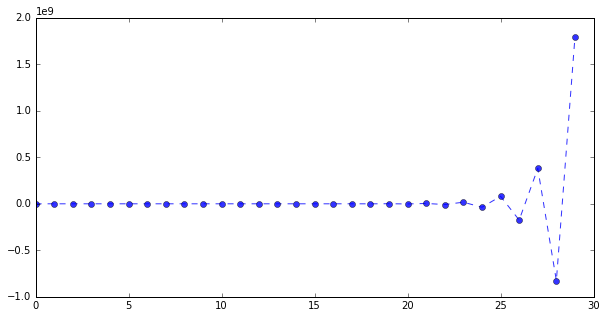

In [76]:
#(3) Simulated path for y_t, N=1000
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 30
std = 1.0
phi_1 = -1.8
phi_2 = 0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0])
Simul_y = np.zeros(N)

for i in range(0,N):    
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    #Simul_x each row represents the state vector for that time. row 0 = x_0, row 1 = x_1 ...
    Simul_y[i] = np.dot(G, Simul_x[i,:]) 
    #Simul_y represents the choice vector [y_0, y_1, ... , y_N]  
        
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

In [73]:
Simul_x

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ],
       [ 0.8       ,  1.        ,  0.        ],
       [ 0.64      ,  0.8       ,  0.        ],
       [ 0.512     ,  0.64      ,  0.        ],
       [ 0.4096    ,  0.512     ,  0.        ],
       [ 0.32768   ,  0.4096    ,  0.        ],
       [ 0.262144  ,  0.32768   ,  0.        ],
       [ 0.2097152 ,  0.262144  ,  0.        ],
       [ 0.16777216,  0.2097152 ,  0.        ],
       [ 0.13421773,  0.16777216,  0.        ],
       [ 0.10737418,  0.13421773,  0.        ],
       [ 0.08589935,  0.10737418,  0.        ],
       [ 0.06871948,  0.08589935,  0.        ],
       [ 0.05497558,  0.06871948,  0.        ],
       [ 0.04398047,  0.05497558,  0.        ],
       [ 0.03518437,  0.04398047,  0.        ],
       [ 0.0281475 ,  0.03518437,  0.        ],
       [ 0.022518  ,  0.0281475 ,  0.        ],
       [ 0.0180144 ,  0.022518  ,  0.        ],
       [ 0.01441152,  0.0180144 ,  0.   

In [ ]:
#(4)
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
 
# N: number of periods for the transition

# std: st.d of innovation

N = 20
std = 1.0
phi_1 = -1.8
phi_2 = 0.81
theta = 0.5

A = np.array(([phi_1,phi_2,theta],[1,0,0],[0,0,0]))    
 
C = np.array([1,0,1]) 
 
G = np.array([1,0,0]) 
    
# == set up the simulation == #

Simul_shock = np.zeros(N)
Simul_shock[0]=std

#Simul_shock = np.random.normal(0, std, N)
Simul_x = np.zeros((N+1,3))
Simul_x[0,:]=np.array([0,0,0]) 
Simul_y = np.zeros(N)

for i in range(0,N):#This is the correct code, but I don't understand why it works.     
    Simul_x[i+1,:] = np.dot(A, Simul_x[i,:])+np.dot(C, Simul_shock[i]) 
    Simul_y[i] = np.dot(G, Simul_x[i,:]) 
          
# Plot the simulation
 
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N) 
ax.plot(Simul_y, 'bo--',  alpha=0.8) 
plt.show()    

Answer: **No this is not a mean reverting process**

# Question 2

Consider the following AR(2) process 

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t$$

(1) Write down the linear state space system to represent the equations above

(2) State the condition on $\phi_1$ and $\phi_2$ for co-variance stationary. 

(3) Assume $\phi_1=-1.6$, $\phi_2=0.64$. Start from $y_{-1}=0$ and $y_{-2}=0$, simulate the system for $N=200$ periods and repeat it for $S=500$ times. Plot the sample distribution of $y_t$ at $t=10$, $t=100$ and $t=150$. 

(4) Use the same parameter as in part (3). Plot the stationary distribution of $y_t$.
 

# Question 3



Consider the Solow growth model discussed in the class:

Production function: 

$$y_t= \exp(z_t) k_t^\alpha$$

Technology: 
    
$$z_t =\rho z_{t-1}+w_t$$    

Saving rate: $$s$$

Consumption: 

$$c_t=(1-s)y_t=(1-s)\exp(z_t) k_t^\alpha$$

Law of motion for capital: 

$$k_{t+1}=(1-\delta)k_t+s y_t=(1-\delta)k_t+s \exp(z_t) k_t^\alpha$$

(1) Log-linearize the  model around the steady state. Write down the log-linearized version of the production function and the law of motion of capital. 

(2) Use the lag opperator, express the log-deviation of output and capital as ARMA processes of the shock $w_t$.

(3) Use the following parameter: $\alpha=0.36$, $\rho=0.95$, $s=0.4$, $\delta=0.1$, and assume $w_t\sim \mathcal N(0,1)$. Simulate the log-deviation of output and capital for 200 periods. Plot the simulated paths of capital and output on the same graph.

# Question 4



(1) Consider the following AR(1) process for the state variable $x_t$

$$ x_{t+1}=\rho x_{t}+ w_{t+1}$$
 
where $\rho\in(0,1)$ and $w_t\sim \mathcal N(0,1)$. 

Write down the conditional forecast formula for $x_{t+j}$  conditional on observing $x_t$, i.e., what is $\mathbb E [x_{t+j}| x_t]$? (This is an analytical question.)

 

(2) Write down the forecast formula of the geometric forecast sum of $x_t$, i.e., what is $\sum_{j=0}^\infty \beta^j \mathbb E  [x_{t+j}| x_t]$? (This is an analytical question.)

(3) Now assume the system is the following ARMA(2,1) process

$$ y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2} + w_t+\theta w_{t-1}$$

Write down the linear state space system for this process. Assume that $\phi_1=-1.8$, $\phi_2=0.81$, $\theta=0.5$, and $w_t\sim \mathcal N(0,1)$. Given $x_t$=1, plot $\mathbb E [x_{t+j}| x_t]$ for $j=0$ to $j=100$.  
